In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
%matplotlib inline
pc.config.cloudy_exe = '/usr/local/Cloudy/c17.01/source/cloudy.exe'

In [2]:
pc.config.cloudy_exe

'/usr/local/Cloudy/c17.01/source/cloudy.exe'

In [3]:
Min = pc.CloudyInput('../models/hii_Um3')

In [4]:
Min.set_BB?

Signature: Min.set_BB(Teff=None, lumi_unit=None, lumi_value=None)
Docstring:
Add a Black Body as SED.
Parameters:
    - Teff: Effective temeprature, in K.
    - lumi_unit:    a Cloudy unit for the luminosity (e.g 'q(H)', 'total luminosity', 'logU')
    - lumi_value:    the value of the luminosity
File:      ~/anaconda/envs/py3k6/lib/python3.6/site-packages/pyCloudy/c1d/cloudy_model.py
Type:      method


In [5]:
Min.set_BB(Teff=56000, lumi_unit='ionisation parameter', lumi_value=-3)

In [6]:
Min.set_cste_density(3)

In [7]:
Min.set_abund(predef='HII region')

In [8]:
Min.set_iterate()

In [9]:
Min.set_other(('cosmic ray background', 'element limit off -8', 'print line optical depth'))

In [10]:
Min.set_distance(1.)

In [11]:
Min.print_input()

In [12]:
!cat ../models/hii_Um3.in

////////////////////////////////////
title hii_Um3
////////////////////////////////////
set punch prefix "hii_Um3"
Blackbody 56000.000000
ionisation parameter = -3.000
hden = 3.000
filling factor = 1.0
abundances HII region no grains
distance = 1000.0 parsecs linear
iterate
cosmic ray background
element limit off -8
print line optical depth
save last radius ".rad"
save last continuum ".cont"
save last physical conditions ".phy"
save last overview ".ovr"
save last heating ".heat"
save last cooling ".cool"
save last optical depth ".opd"
save last element hydrogen ".ele_H"
save last element helium ".ele_He"
save last element carbon ".ele_C"
save last element nitrogen ".ele_N"
save last element oxygen ".ele_O"
save last element argon ".ele_Ar"
save last element neon ".ele_Ne"
save last element sulphur ".ele_S"
save last element chlorin ".ele_Cl"
save last element iron ".ele_Fe"
save last element silicon ".ele_Si"


In [13]:
Min.run_cloudy()

In [14]:
M = pc.CloudyModel?

Init signature: pc.CloudyModel(model_name, verbose=None, read_all_ext=True, read_rad=True, read_phy=True, read_emis=True, read_grains=False, read_cont=True, read_heatcool=False, read_lin=False, read_opd=False, list_elem=['H', 'He', 'C', 'N', 'O', 'Ne', 'Ar', 'S', 'Cl', 'Fe', 'Si'], distance=None, line_is_log=False, emis_is_log=True, ionic_str_key='ele_')
Docstring:     
Read the outputs of Cloudy into variables of the object. Also perform some computations
like T0, t2 for all the ions and lines.
Provides methods to access some outputs (e.g. continuum in various units)

The Cloudy model must have been run with the following punch or save in the input file:

set punch prefix "MODEL" (can be changed)
punch last radius ".rad"
punch last continuum ".cont"
punch last physical conditions ".phy"
punch last overview ".ovr"
punch last grain temperature ".gtemp_full"
punch last element hydrogen ".ele_H"
punch last element helium ".ele_He"
punch last element carbon ".ele_C"
punch last element nitr

In [15]:
M = pc.CloudyModel('../models/hii_Um3')

warng CloudyModel ../models/hii_Um3: ../models/hii_Um3.emis does not exist.


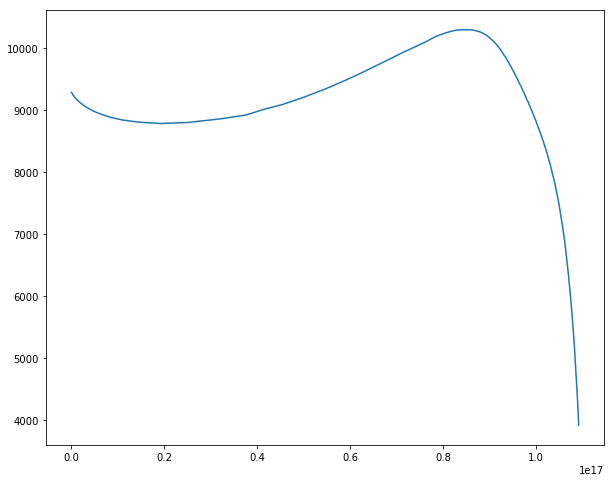

In [16]:
f, ax = plt.subplots(figsize=(10,8))
ax.plot(M.depth, M.te);

In [17]:
M.print_stats()

 Name of the model: ../models/hii_Um3
 R_in (cut) = 1.000e+30 (1.000e+30), R_out (cut) = 1.000e+30 (1.000e+30)
 H+ mass = 9.88e+23, H mass = 1.16e+24 N zones: 145
 <H+/H> = 0.95, <He++/He> = 0.00, <He+/He> = 0.95
 <O+++/O> = 0.00, <O++/O> = 0.35, <O+/O> = 0.59
 <N+++/O> = 0.00, <N++/O> = 0.44, <N+/O> = 0.53
 T(O+++) = 8982, T(O++) = 9071, T(O+) = 9470
 <ne> = 942,  <nH> = 1000, T0 = 9328, t2=0.0035
 <log U> = -3.00


In [18]:
M.plot_spectrum?

Signature: M.plot_spectrum(xunit='eV', cont='ntrans', yunit='es', ax=None, xlog=True, ylog=True, **kargv)
Docstring:
plot the spectrum of the model.
parameters:
    - xunit ['eV']
    - cont ['ntrans']
    - yunit ['es']
    - ax
    - xlog [True]
    - ylog [True]
    - **kargv passed to the plot.
File:      ~/anaconda/envs/py3k6/lib/python3.6/site-packages/pyCloudy/c1d/cloudy_model.py
Type:      method


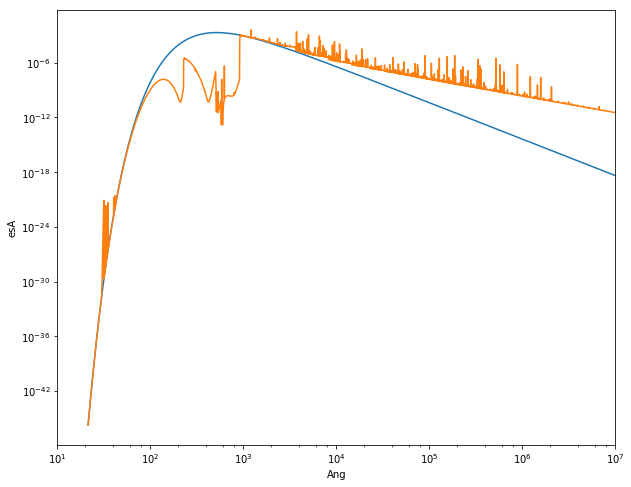

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
M.plot_spectrum(ax=ax, cont='incid', xunit='Ang', yunit='esA')
M.plot_spectrum(ax=ax, xunit='Ang', yunit='esA')
ax.set_xlim((10, 1e7));

In [20]:
Min.set_stop('thickness {}'.format(np.log10(8.5e16)))
Min.model_name = '../models/hii_Um3_cut'

In [21]:
Min.print_input()

In [22]:
Min.run_cloudy()

In [23]:
M2 = pc.CloudyModel('../models/hii_Um3_cut')

warng CloudyModel ../models/hii_Um3_cut: ../models/hii_Um3_cut.emis does not exist.


In [24]:
print(M.thickness, M2.thickness)

1.09218989e+17 8.4693989e+16


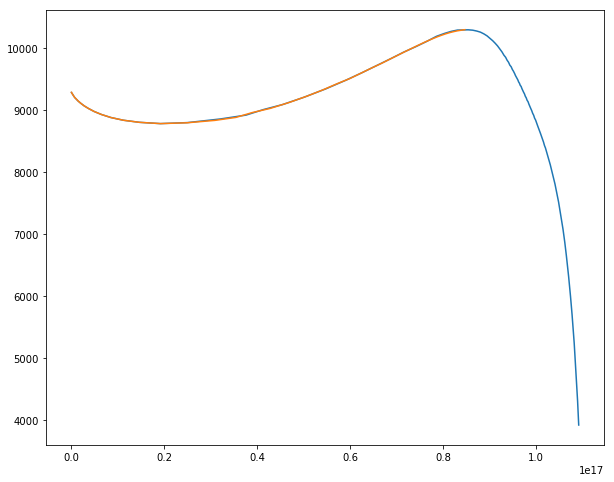

In [25]:
f, ax = plt.subplots(figsize=(10,8))
ax.plot(M.depth, M.te)
ax.plot(M2.depth, M2.te)

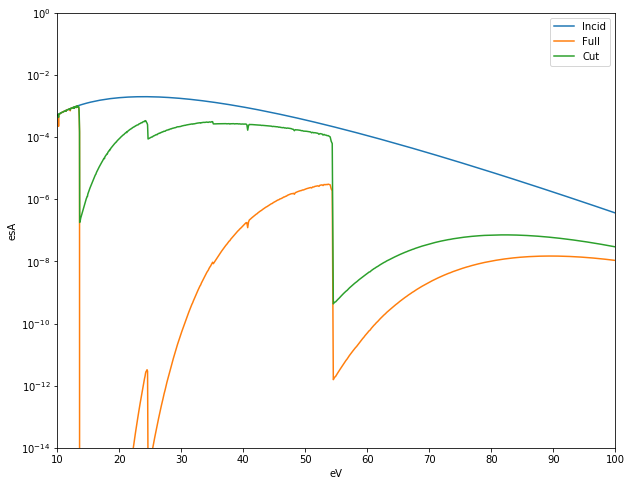

In [26]:
f, ax = plt.subplots(figsize=(10, 8))
M.plot_spectrum(ax=ax, cont='incid', xunit='eV', yunit='esA', xlog=False, label='Incid')
M.plot_spectrum(ax=ax, cont='trans', xunit='eV', yunit='esA', xlog=False, label='Full')
M2.plot_spectrum(ax=ax, cont='trans', xunit='eV', yunit='esA', xlog=False, label='Cut')
ax.legend()
ax.set_xlim((10, 100))
ax.set_ylim((1e-14, 1e0));

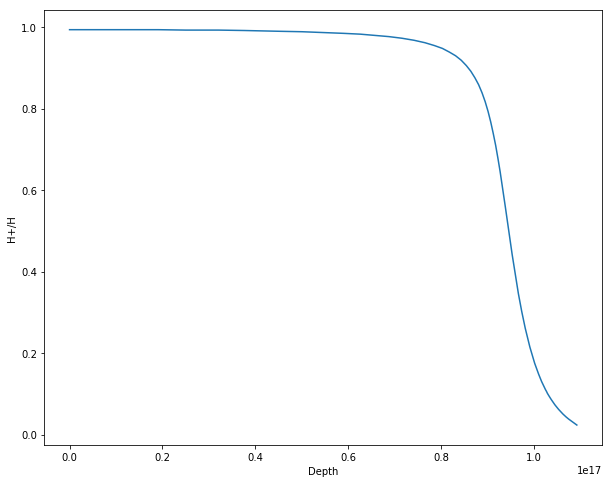

In [27]:
f, ax = plt.subplots(figsize=(10, 8))
ax.plot(M.depth, M.get_ionic('H', 1))
ax.set_xlabel('Depth')
ax.set_ylabel('H+/H')